In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error

input_file = "train.csv"

# comma delimited is the default
df = pd.read_csv(input_file, header = 0)
# put the original column names in a python list
original_headers = list(df.columns.values)
# remove the non-numeric columns
df = df._get_numeric_data()
# put the numeric column names in a python list
numeric_headers = list(df.columns.values)
# create a numpy array with the numeric values for input into scikit-learn
data = df.as_matrix()

x = data[:, 2:]
y = data[:, 1:2]

n = len(data)
folds = 10
lambdas = [0.01, 0.1, 1, 10, 100]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.6639584854705927


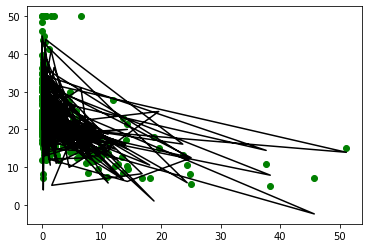

[[25.86122462]
 [15.45240195]
 [17.29781253]
 [27.48451868]
 [ 1.02907209]
 [31.30523155]
 [26.12534195]
 [23.8297525 ]
 [17.27744549]
 [35.34608704]
 [18.97810336]
 [27.08281497]
 [43.85138357]
 [16.10600301]
 [21.49451323]
 [20.42655238]
 [28.14940317]
 [24.5259356 ]
 [22.73093882]
 [36.42239783]
 [31.60886517]
 [14.23452852]
 [31.81989614]
 [17.64220846]
 [12.90950878]
 [35.5020311 ]
 [21.51135485]
 [19.13509912]
 [20.01223555]
 [17.80285802]
 [12.66535903]
 [ 6.6869835 ]
 [21.54561138]
 [18.74730154]
 [30.06368181]
 [22.57880385]
 [20.01380394]
 [15.96625777]
 [23.85825109]
 [27.67665069]
 [24.17753198]
 [13.29398995]
 [28.12946911]
 [14.44632854]
 [34.55284114]
 [12.80291662]
 [27.45851657]
 [42.16397262]
 [29.54632421]
 [20.99712556]
 [24.90492796]
 [21.62122106]
 [23.18720601]
 [ 8.01502723]
 [22.64307502]
 [21.52058026]
 [39.38372338]
 [15.17744393]
 [34.074628  ]
 [18.94726219]
 [29.17042232]
 [18.71287341]
 [33.05286337]
 [19.8247063 ]
 [17.65679432]
 [18.8792127 ]
 [16.85393

In [96]:
mse = make_scorer(mean_squared_error)

# Test with just splitting data for comparison:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
clf = Ridge(1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

plt.scatter(X_train[:, 0], y_train, color='g')
plt.plot(X_train[:, 0], clf.predict(X_train),color='k')
plt.show()

# Do 10-fold cross validation and calculate average RMSE for each lambda:
for l in lambdas:
    print("lambda =", l, ":")
    clf = Ridge(l)
    #R2s = cross_val_score(clf, x, y, cv=folds)
    MSEs = cross_val_score(clf, x, y, cv=folds, scoring=mse)
    RMSEs = np.sqrt(MSEs)
    print("MSEs:", MSEs)
    print("RMSEs:", RMSEs)
    print("Average RMSE:", RMSEs.mean())
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print()
